In [22]:
from __init__ import *

In [23]:
#summary statics 
df=pd.read_csv("../data/togo-dapaong_qc.csv")
summary_stats=df.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [24]:
# check for missing values
missing_values=df.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [25]:
#checking for outlier or incorrect entries
numeric_columns=['GHI',"DNI",'DHI',"WS",'WSgust','ModA',"ModB","Tamb","RH","WD","TModA","Precipitation","WSstdev","WDstdev","BP"]
for col in numeric_columns:
    print(f'Summary for {col}:\n',df[col].describe())
    if (df[col]<0).any():
        print(f'negative values found in {col}')
    

Summary for GHI:
 count    525600.000000
mean        230.555040
std         322.532347
min         -12.700000
25%          -2.200000
50%           2.100000
75%         442.400000
max        1424.000000
Name: GHI, dtype: float64
negative values found in GHI
Summary for DNI:
 count    525600.000000
mean        151.258469
std         250.956962
min           0.000000
25%           0.000000
50%           0.000000
75%         246.400000
max        1004.500000
Name: DNI, dtype: float64
Summary for DHI:
 count    525600.000000
mean        116.444352
std         156.520714
min           0.000000
25%           0.000000
50%           2.500000
75%         215.700000
max         805.700000
Name: DHI, dtype: float64
Summary for WS:
 count    525600.000000
mean          2.368093
std           1.462668
min           0.000000
25%           1.400000
50%           2.200000
75%           3.200000
max          16.100000
Name: WS, dtype: float64
Summary for WSgust:
 count    525600.000000
mean          3.2

In [ ]:
# check for outlier using the IOR method
df_clean=df.copy()
for col in numeric_columns:
    z_scores=stats.zscore(df[col].dropna())
    df_clean=df_clean[(abs(z_scores) < 3)]
# reloded needed becouse of some column removal

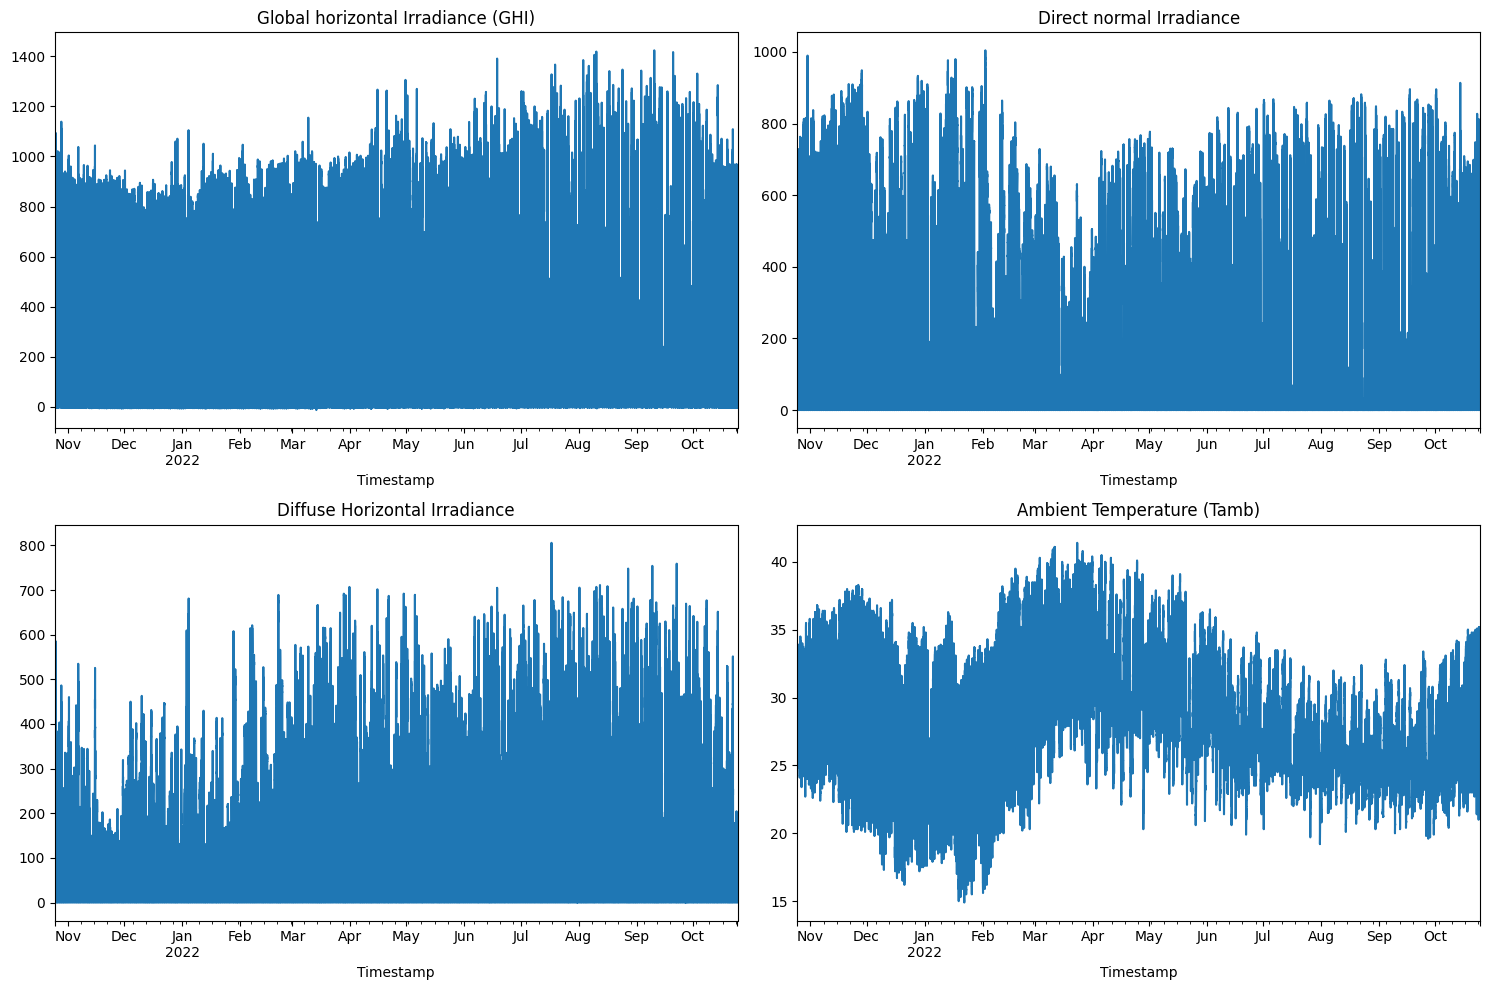

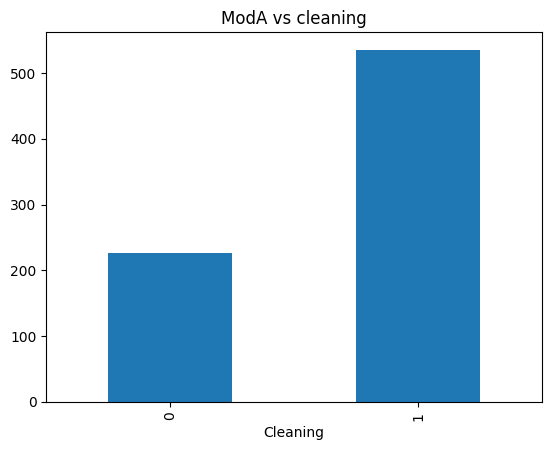

In [27]:
#time series analysis
# df = pd.read_csv('../data/togo-dapaong_qc.csv')
# print(df.columns)
df["Timestamp"]=pd.to_datetime(df['Timestamp'])
df.set_index("Timestamp",inplace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['GHI'].plot(title="Global horizontal Irradiance (GHI)")
plt.subplot(2,2,2)
df['DNI'].plot(title="Direct normal Irradiance")
plt.subplot(2,2,3)
df['DHI'].plot(title="Diffuse Horizontal Irradiance")
plt.subplot(2,2,4)
df['Tamb'].plot(title="Ambient Temperature (Tamb)")
plt.tight_layout()
plt.show()
#plot cleaning impact
df.groupby('Cleaning')['ModA'].mean().plot(kind='bar',title='ModA vs cleaning')
plt.show()


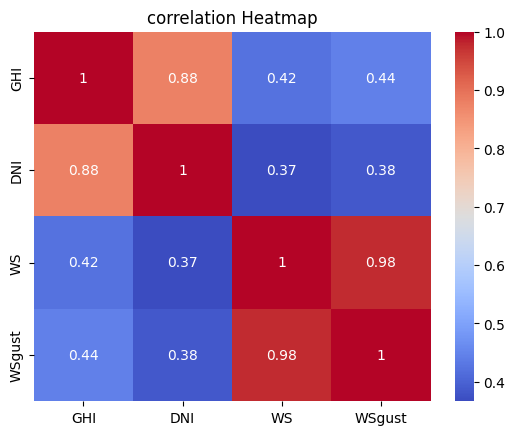

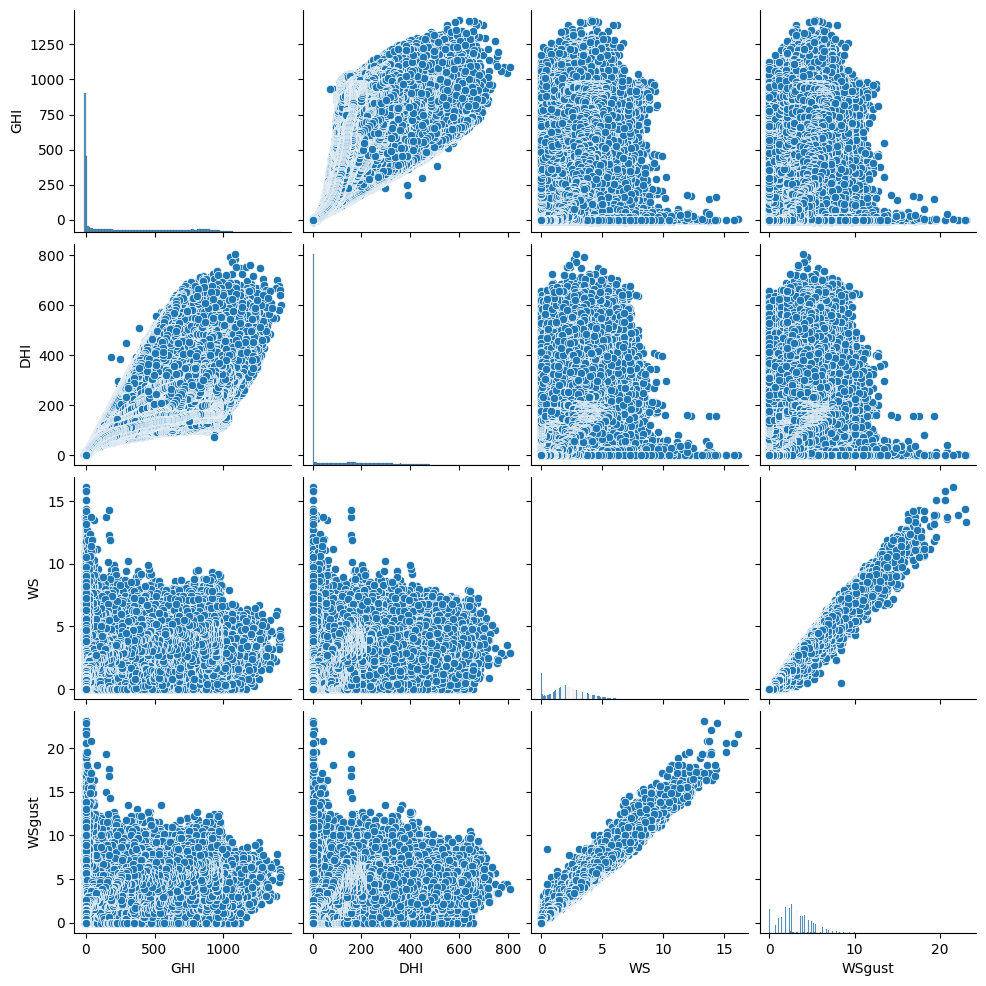

In [28]:
# correlation analysis  
#correlation heatmap
correlation_matrix=df[["GHI","DNI","WS","WSgust"]].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("correlation Heatmap")
plt.show()

#scatter matrices
sns.pairplot(df[["GHI",'DHI','WS','WSgust']])
plt.show()

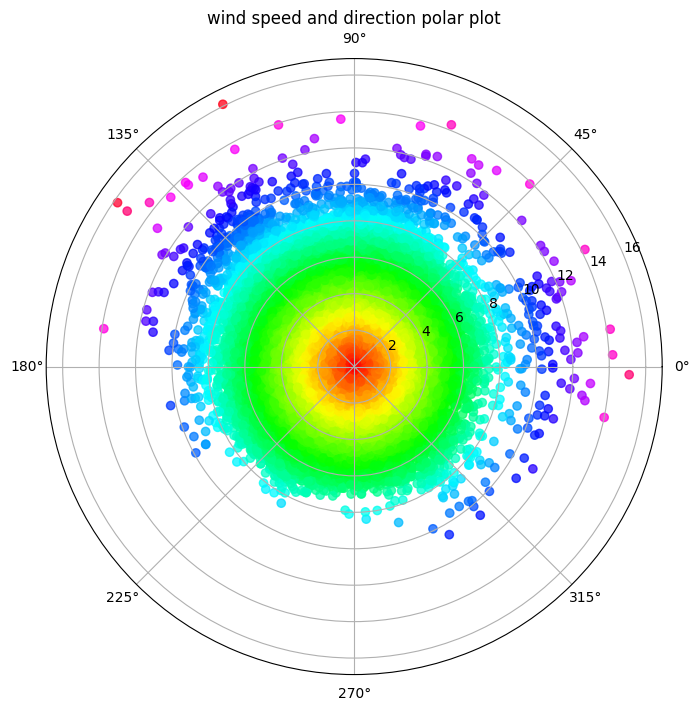

In [29]:
#wind analysis
# wind speed and direction polat plot
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='polar')
wind_dir=np.deg2rad(df['WD'].dropna())
wind_speed=df['WS'].dropna()
ax.scatter(wind_dir, wind_speed, c=wind_speed, cmap='hsv', alpha=0.75)
plt.title("wind speed and direction polar plot")
plt.show()

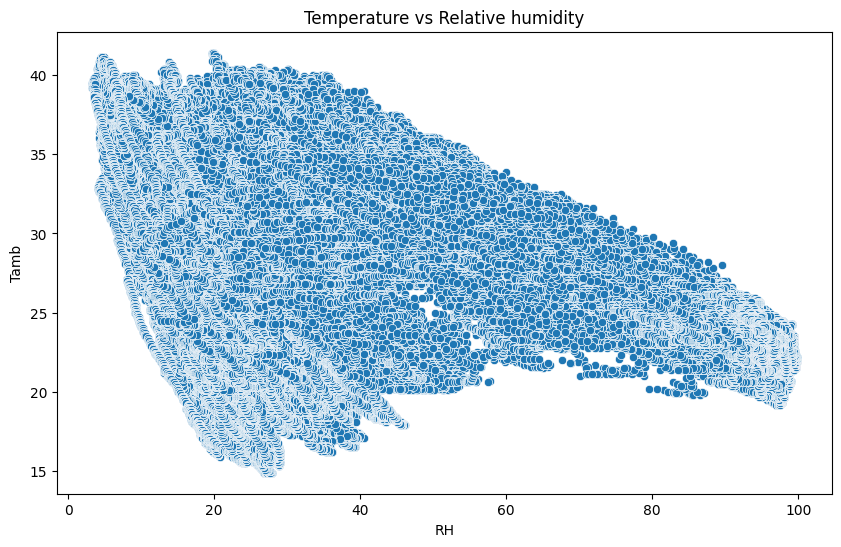

In [30]:
#tempreture analysis
#tempreature vs.relative humidity
plt.figure(figsize=(10,6))
sns.scatterplot(x='RH',y='Tamb',data=df)
plt.title('Temperature vs Relative humidity')
plt.show()

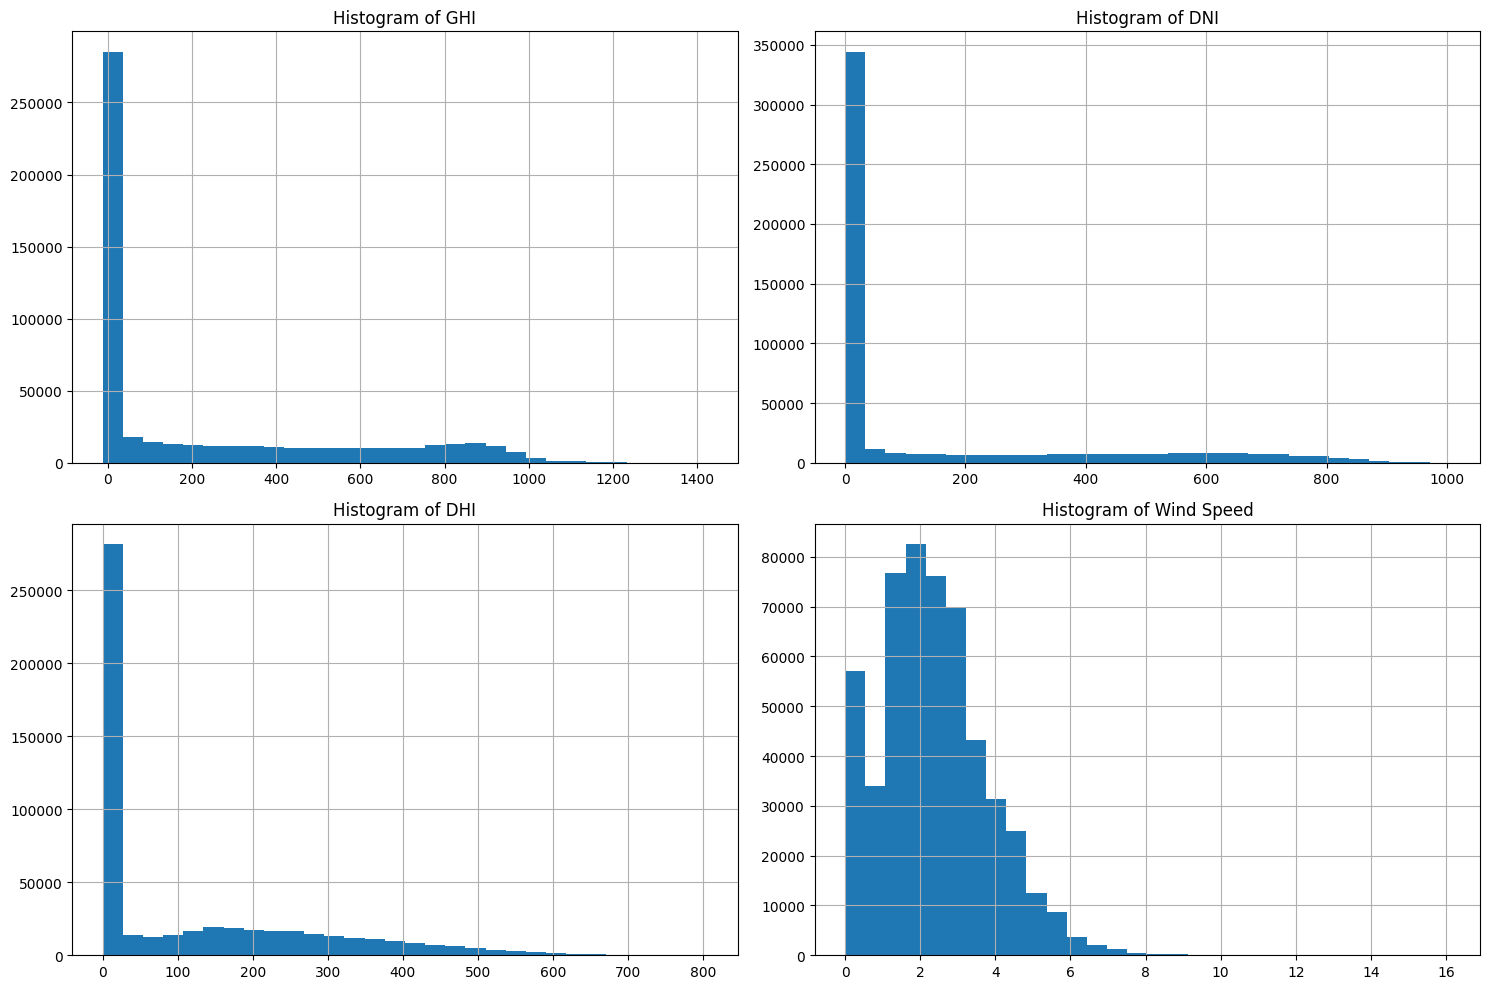

In [31]:
# Plot histograms for variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df['GHI'].hist(bins=30)
plt.title('Histogram of GHI')
plt.subplot(2, 2, 2)
df['DNI'].hist(bins=30)
plt.title('Histogram of DNI')
plt.subplot(2, 2, 3)
df['DHI'].hist(bins=30)
plt.title('Histogram of DHI')
plt.subplot(2, 2, 4)
df['WS'].hist(bins=30)
plt.title('Histogram of Wind Speed')
plt.tight_layout()
plt.show()


In [32]:
# Z-score for detecting anomalies
df_z_scores = df.copy()
for col in numeric_columns:
    df_z_scores[col + '_zscore'] = stats.zscore(df[col].dropna())


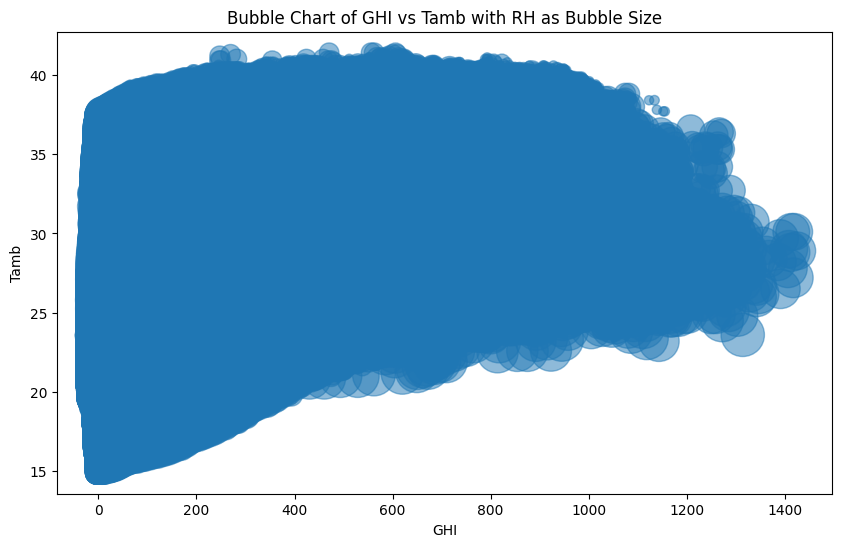

In [33]:
# Bubble chart GHI vs Tamb with bubble size representing RH
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart of GHI vs Tamb with RH as Bubble Size')
plt.show()


In [34]:
#cleaning the data
# Handling missing values
df_cleaned = df.dropna(subset=['Comments'])  # Example: Dropping rows where Comments are null
df_cleaned.to_csv('../data/togo-dapaong_qc.csv', index=False)
